<a href="https://colab.research.google.com/github/raulbenitez/PRML_Probabilistic_classifiers/blob/main/Probabilistic_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T2. PROBABILISTIC CLASSIFIERS 

- LINEAR DISCRIMINANT ANALYSIS (LDA)
- NAÏVE BAYES
- KNN
- DECISION TREES 

## 2.1 LINEAR DISCRIMINANT ANALYSIS (LDA)

The Bayes theorem in the context of data classification:
\begin{equation*}
p(\omega_i|\vec{x}) = \frac{p(\vec{x}|\omega_i) p(\omega_i)}{p(\vec{x})}
\end{equation*}
where $\vec{x} = \{x_1,\dots,x_d\}$ is an observation in a d-dimensional feature space and $\omega_i$ is a label for class $i$. The distribution $p(\omega_i|\vec{x})$ is called **posterior distribution** and provides the probability of a class $\omega_i$ conditional to the observation of the data $\vec{x}$. $p(\vec{x}|\omega_i)$ is the **likelihood function** and models the class-conditional distribution of the observations. The **prior distribution** $p(\omega_i)$ describes the apriori occurrence of the different classes and can be modeled by an expert or by count data. The **marginal distribution** $p(\vec{x})$ is just a normalization constant and is not relevant for classification pourposes. 

Bayesian decision theory: Assign observation $\vec{x}$ to the class that maximizes the posterior probability $p(\omega_i|\vec{x})$:

\begin{equation*}
\text{argmax}_{i \in 1,\dots,G} p(\omega_i|\vec{x}) 
\end{equation*}

We define the discriminant function $g_i(\vec{x})$ as:
\begin{equation*}
g_i(\vec{x}) = \log p(\omega_i|\vec{x}) = \log p(\vec{x}|\omega_i) + \log p(\omega_i) + Constant
\end{equation*}

When all $G$ classes have equal prior probabilities $p(\omega_i)=1/G$, the Maximum a Posteriori decision is equivalent to a Maximum Likelihood since 
the posterior is proportional to the likelihood function $p(\omega_i|\vec{x}) \propto p(\vec{x}|\omega_i)$. 

Let's assume that observations $\vec{x}$ belonging to class $\omega_i$ are distributed according to a d-dimensional multivariate normal $N(\vec{\mu}_i,\Sigma_i)$. The likelihood is then given by:

\begin{equation*}
p(\vec{x}|\omega_i) = \frac{1}{(2\pi)^{d/2} |\Sigma_i|^{1/2}} 
\exp \{\frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)\}
\end{equation*}

and the discriminant function $g_i(\vec{x})$ is then given by:

\begin{equation*}
g_i(\vec{x}) = \log p(\omega_i|\vec{x}) = -\frac{d}{2}\log 2\pi -\frac{1}{2}\log|\Sigma_i| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)+\log p(\omega_i)
\end{equation*}

Multi-class supervised classification algorithm based on discriminant functions: 

[1] Construct a {\bf training set} of labeled observations $\mathcal{D}_i$ for each class $\omega_i, \, i=1,\dots,G$:

\begin{eqnarray*}
\mathcal{D}_i = \{\vec{x}_1,\dots,\vec{x}_N \}
\end{eqnarray*}

[2] Use training sets $\mathcal{D}_i, \, i=1,\dots,G$ to estimate the i-the class parameters $(\mu_i,\Sigma_i)$. 

[3] Classify a new unlabeled observation $\vec{x}_{new}$ to the class with maximum discriminant function:

\begin{equation*}
\text{argmax}_{i \in 1,\dots,G} g_i(\vec{x}_{new}) 
\end{equation*}


Limit cases: 

- **Quadratic Discriminant Analysis (QDA)**: The complete model with full covariance matrices for each class. The decision boundary is quadratic. 

\begin{eqnarray*}
p(\vec{x}|\omega_i) &=& \frac{1}{(2\pi)^{d/2} |\Sigma_i|^{1/2}} \exp\{\frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)\} \\
g_i(\vec{x}) &=& \log p(\omega_i|\vec{x}) = -\frac{d}{2}\log 2\pi -\frac{1}{2}\log|\Sigma_i| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)+\log p(\omega_i) = -\frac{1}{2}\log|\Sigma_i| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)+\log p(\omega_i) + Constants
\end{eqnarray*}

- **Linear Discriminant Analysis (LDA)**: Assumes that all classes share the same covariance matrix $\Sigma_i = \Sigma, i=1,\dots G$. The likelihood and discriminant functions are then given by: 

\begin{eqnarray*}
p(\vec{x}|\omega_i) &=& \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\{\frac{1}{2}(\vec{x}-\mu_i)^T \Sigma^{-1} (\vec{x}-\mu_i)\} \\
g_i(\vec{x}) &=& \log p(\omega_i|\vec{x}) = -\frac{d}{2}\log 2\pi -\frac{1}{2}\log|\Sigma| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma^{-1} (\vec{x}-\mu_i)+\log p(\omega_i) = - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma^{-1} (\vec{x}-\mu_i)+\log p(\omega_i) + Constants
\end{eqnarray*}

- **Gaussian Naive Bayes (GNB)**: Assumes that the covariance matrices for each class are diagonal, therefore assuming independence between the features. The Gassian Naive Bayes assumes univariate normal distributions for each feature $x_j \sim N(x_j|\mu_i,\sigma_i^2), j=1,\dots d$, i.e. 

$p(x_j|\omega_i) = \frac{1}{\sqrt{2\pi}\sigma_i} \exp \{- \frac{(x_j-\mu_i)^2}{2\sigma^2_i}\} $

\begin{equation*}
p(\vec{x}|\omega_i) = \prod_{j=1}^d p(x_j|\omega_i) = \frac{\exp \{ -\frac{1}{2}\sum_{j=1}^d (\frac{x_j-\mu_i}{\sigma_i})^2\}}{(2\pi)^{d/2}\prod_{j=1}^d \sigma_i}
\end{equation*}

The resulting discriminant function is then given by

\begin{equation*}
g_i(\vec{x}) = -\frac{d}{2}\log 2\pi -d \log \sigma_i - \frac{1}{2\sigma_i}\sum_{i=1}^d (x_j-\mu_i)^2 + \log p(\omega_i)
\end{equation*}





### Linear Discriminant Analysis (LDA) on Synthetic data:

LDA assumes that the covariance matrix 

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


[1.]
[2.]


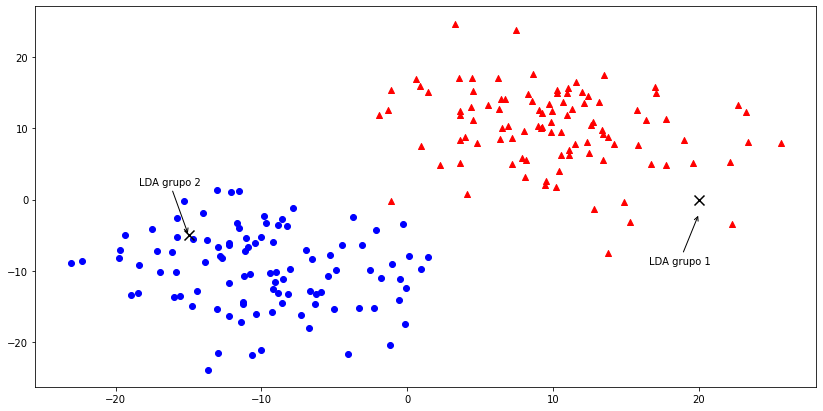

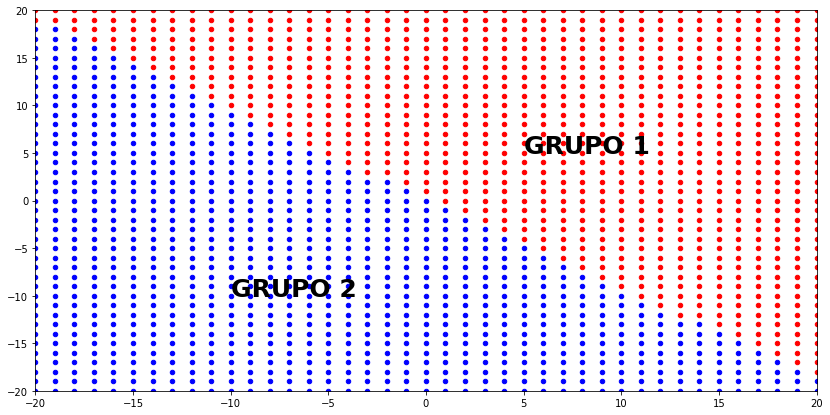

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Synthetic Gaussian training data:
mu1, sigma1 = 10, 5.5
X1 = mu1 + sigma1*np.random.randn(100,2)
mu2, sigma2 = -10, 5.5
X2 = mu2 + sigma2*np.random.randn(100,2)

# Graphical representation of training data: 
plt.figure(figsize=(14,7))
ax0 = plt.subplot(111)
plt.scatter(X1[:,0],X1[:,1],marker ='^',c='r')
plt.scatter(X2[:,0],X2[:,1],marker ='o',c='b')

# Concatenate observations along the two dimensions:
XT = np.concatenate((X1,X2))

# Label observations according to class labels:
label1 = np.ones(X1.shape[0])
label2 = 2*np.ones(X2.shape[0])
labelT = np.concatenate((label1,label2))

# Training the model: 
clf = LinearDiscriminantAnalysis(n_components=2,priors=None)
clf.fit(XT, labelT)

#Prediction of new observations:
print(clf.predict([[20, 0]])) #predicciÛn para el dato [20,0]
print(clf.predict([[5, -20]]))#predicciÛn para el dato [5,-20]

# Represent the new observations [20,0] y [5,-20]:
plt.scatter(20,0,s=100,marker ='x',c='k')
plt.annotate('LDA class 1',xy=(20,-2),xycoords='data',
               xytext=(-50,-50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->")) 
plt.scatter(-15,-5,s=100,marker ='x',c='k')
plt.annotate('LDA class 2',xy=(-15,-5),xycoords='data',
               xytext=(-50,50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->")) 

# Representation of the decision boundary by predicting the observations in a meshgrid:
plt.figure(figsize=(14,7))
for i in range(-20,21,1):
    for k in range(-20,21,1):
        p = clf.predict([[i, k]])
        if p == 1:
             plt.scatter(i,k,s=20,marker='o',c='r')
        else:
             plt.scatter(i,k,s=20,marker = 'o',c='b')

plt.axis([-20,20,-20,20])
plt.text(5,5,'CLASS 1',fontsize=25,fontweight='bold',color='k')
plt.text(-10,-10,'CLASS 2',fontsize=25,fontweight='bold',color='k')
plt.show()

### Quadratic Discriminant Analysis on Synthetic data:

[1.]
[2.]


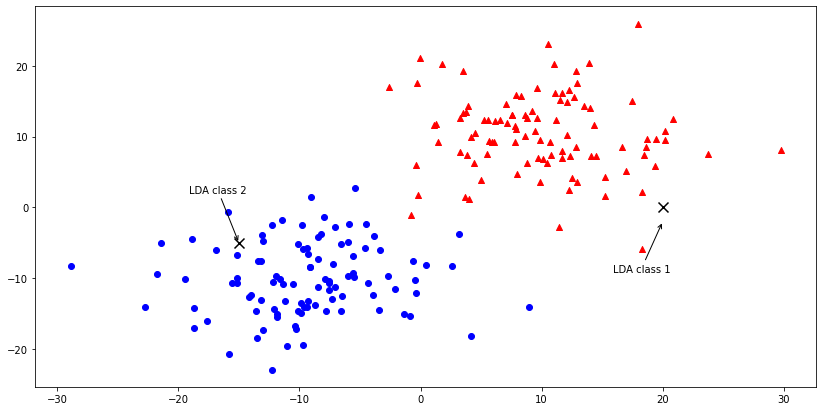

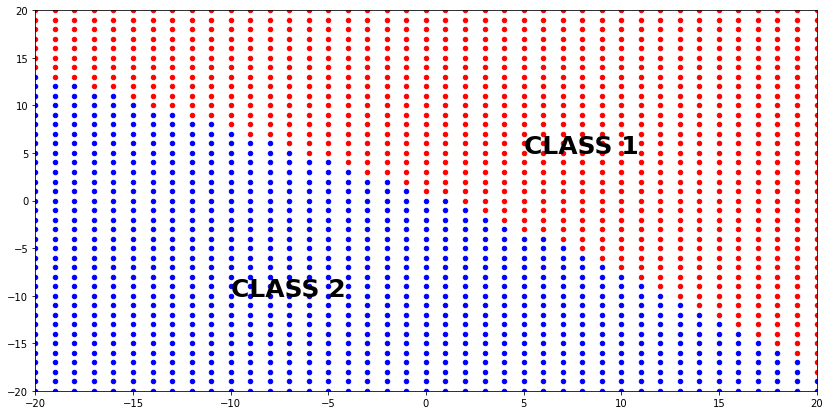

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Synthetic Gaussian training data:
mu1, sigma1 = 10, 5.5
X1 = mu1 + sigma1*np.random.randn(100,2)
mu2, sigma2 = -10, 5.5
X2 = mu2 + sigma2*np.random.randn(100,2)

# Graphical representation of training data: 
plt.figure(figsize=(14,7))
ax0 = plt.subplot(111)
plt.scatter(X1[:,0],X1[:,1],marker ='^',c='r')
plt.scatter(X2[:,0],X2[:,1],marker ='o',c='b')

# Concatenate observations along the two dimensions:
XT = np.concatenate((X1,X2))

# Label observations according to class labels:
label1 = np.ones(X1.shape[0])
label2 = 2*np.ones(X2.shape[0])
labelT = np.concatenate((label1,label2))

# Training the model: 
clf = QuadraticDiscriminantAnalysis(priors=None)
clf.fit(XT, labelT)

#Prediction of new observations:
print(clf.predict([[20, 0]])) #predicciÛn para el dato [20,0]
print(clf.predict([[5, -20]]))#predicciÛn para el dato [5,-20]

# Represent the new observations [20,0] y [5,-20]:
plt.scatter(20,0,s=100,marker ='x',c='k')
plt.annotate('LDA class 1',xy=(20,-2),xycoords='data',
               xytext=(-50,-50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->")) 
plt.scatter(-15,-5,s=100,marker ='x',c='k')
plt.annotate('LDA class 2',xy=(-15,-5),xycoords='data',
               xytext=(-50,50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->")) 

# Representation of the decision boundary by predicting the observations in a meshgrid:
plt.figure(figsize=(14,7))
for i in range(-20,21,1):
    for k in range(-20,21,1):
        p = clf.predict([[i, k]])
        if p == 1:
             plt.scatter(i,k,s=20,marker='o',c='r')
        else:
             plt.scatter(i,k,s=20,marker = 'o',c='b')

plt.axis([-20,20,-20,20])
plt.text(5,5,'CLASS 1',fontsize=25,fontweight='bold',color='k')
plt.text(-10,-10,'CLASS 2',fontsize=25,fontweight='bold',color='k')
plt.show()

### Linear Discriminant Analysis with iris data:
Assumes equal covariance matrices for all the classes

In [23]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

clf_lda = LinearDiscriminantAnalysis(n_components=3,priors=None)
clf_lda_trained = clf_lda.fit(iris.data, iris.target)

clf_lda_trained.means_

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 3 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

### Quadratic Discriminant Analysis with iris data:

Does not assume equal covariance matrices for all the classes

In [34]:
from sklearn import datasets
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

iris = datasets.load_iris()

clf_qda = QuadraticDiscriminantAnalysis(priors=None,store_covariance=True)
clf_qda_trained = clf_qda.fit(iris.data, iris.target)

clf_qda_trained.covariance_

[array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
        [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
        [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
        [0.01033061, 0.00929796, 0.00606939, 0.01110612]]),
 array([[0.26643265, 0.08518367, 0.18289796, 0.05577959],
        [0.08518367, 0.09846939, 0.08265306, 0.04120408],
        [0.18289796, 0.08265306, 0.22081633, 0.07310204],
        [0.05577959, 0.04120408, 0.07310204, 0.03910612]]),
 array([[0.40434286, 0.09376327, 0.3032898 , 0.04909388],
        [0.09376327, 0.10400408, 0.07137959, 0.04762857],
        [0.3032898 , 0.07137959, 0.30458776, 0.04882449],
        [0.04909388, 0.04762857, 0.04882449, 0.07543265]])]

**Exercise: Two-class discriminant analysis with 2D features:**

Consider the training set: 

Class $\omega_1$: $\mathcal{D}_1 =\{(3,4),(2,6),(4,6),(3,8)\}$. 

Class $\omega_2$: $\mathcal{D}_2 =\{(3,0),(1,-2),(5,-2),(3,-4)\}$. 

- Obtain sample estimates of the mean and covariance matrix for each class.

- Obtain the discriminant functions $g_1(\vec{x}),g_2(\vec{x})$ assuming equal priors.

- Evaluate $g_1(\vec{x}),g_2(\vec{x})$ to classify a new observation $\vec{x}_{new} = (2,-1)$.

Result: $g_1(\vec{x}) = -(x_1-3)^2-\frac{1}{4}(x_2-6)^2$, $g_2(\vec{x}) = -\frac{1}{4}(x_1-3)^2-\frac{1}{4}(x_2+2)^2$.


## 2.2 NAÏVE BAYES

Assume that features $x_j$ in observation $\vec{x}$ are class-independent. Then the likelihood function factorizes as:
\begin{equation*}
p(\vec{x}|\omega_i) = \prod_{j=1}^d p(x_i|\omega_i)
\end{equation*}
We can select the distribution function that follows each feature, either discrete or continous, thus providing a very flexible method. \\
Choosing univariate normal distributions for each feature $x_j \sim N(x_j|\mu_i,\sigma_i^2), j=1,\dots d$, the discriminant function $g_i(\vec{x})$ is: 

\begin{equation*}
g_i(\vec{x}) = -\frac{d}{2}\log 2\pi -d \log \sigma_i - \frac{1}{2\sigma_i}\sum_{i=1}^d (x_j-\mu_i)^2 + \log p(\omega_i)
\end{equation*}


### Example: Naive Bayes with iris dataset


In [13]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print(y_pred)

from sklearn.metrics import confusion_matrix
y_true = iris.target
confusion_matrix(y_true, y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

## 2.3 K-nearest neighbours (KNN)

Very simple algorithm: An unlabeled observation is classified by assigning the label which is most frequent among the k training samples nearest to that point (i.e. the k-th nearest neighbours).

In the following example we simply define a set of 4 observations in 1d and assign them to two classes (0,1). Then fit the model and predict the class of new observations using the knn algorithm.


In [47]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

print('Training data {}'.format(X))
print('Class labels for training observations {}'.format(y))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y) 
Xnew = np.array([2.5]).reshape(1, -1)
print('The knn prediction for observation Xnew= {} is {}'.format(*Xnew,knn.predict(Xnew)))
Xnew1 = np.array([0.5]).reshape(1, -1)
print('The knn prediction for observation Xnew= {} is {}'.format(*Xnew1,knn.predict(Xnew1)))

Training data [[0], [1], [2], [3]]
Class labels for training observations [0, 0, 1, 1]
The knn prediction for observation Xnew= [2.5] is [1]
The knn prediction for observation Xnew= [0.5] is [0]


## 3.3 DECISION TREES

- Classification And Regression Tress (CART): Solve both regression and classification problems. 

- Tree creation: We start from a training set of labelled observations. Data is splitted in child nodes by using binary queries. The query at each split is selected accoding to a measure of node impurity: A node is said to be pure if all the observations have the same label. 

- The grow of the binary tree creates a set of linear decision boundaries splitting the data in different groups.



**Example: Constructing a decision tree:** 
For each feature, we shoud evaluate how well it splits the data in classes in such a way that each value of the feature contains only one of the classes. One of the evaluation measures is to count how many observations are classified according to the majority of classes in each feature value. Fos instance, the feature cap-shape has two features: convex and bell. If we choose convex, most of the observations are poisonous (3 over a total of 5). A value bell classifies the two observations as edible, so the total goodness of the feature will be (3+2)/7 = 0.71. We proceed similarly with the other features and the result is that all are equally good. So we can choose one of them randomly. Image we select the feature cap-color to split the data. Then we will have three groups according to the three possible values of the feature cap-color. For the value cap-color = brown, the tree ends classifying the observation as poisonous. Something similar occurs for the value yellow,  for which the two observations are classified as edible. In the case cap-color = white we should further develop the tree using the remaining features. For this reduced set ob 4 observations, we should evaluate the goodness of each of the features. Selecting the feature cap-shape will have a goodness of (2+2)/4 = 1 since the valuers bell correctly classify all obsdervations as edible and the value convex as poisonous. The feature gill-color can not do it better: The performance is (2+1)/4=0.75. Then we choose cap-shape and proceed to complete the decision tree as in the following figure: 

### Decision trees with iris

decision_tree_result.png![image.png](attachment:image.png)

In [52]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
iris = datasets.load_iris()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data,iris.target)

Represent the resulting tree structure for the test data:

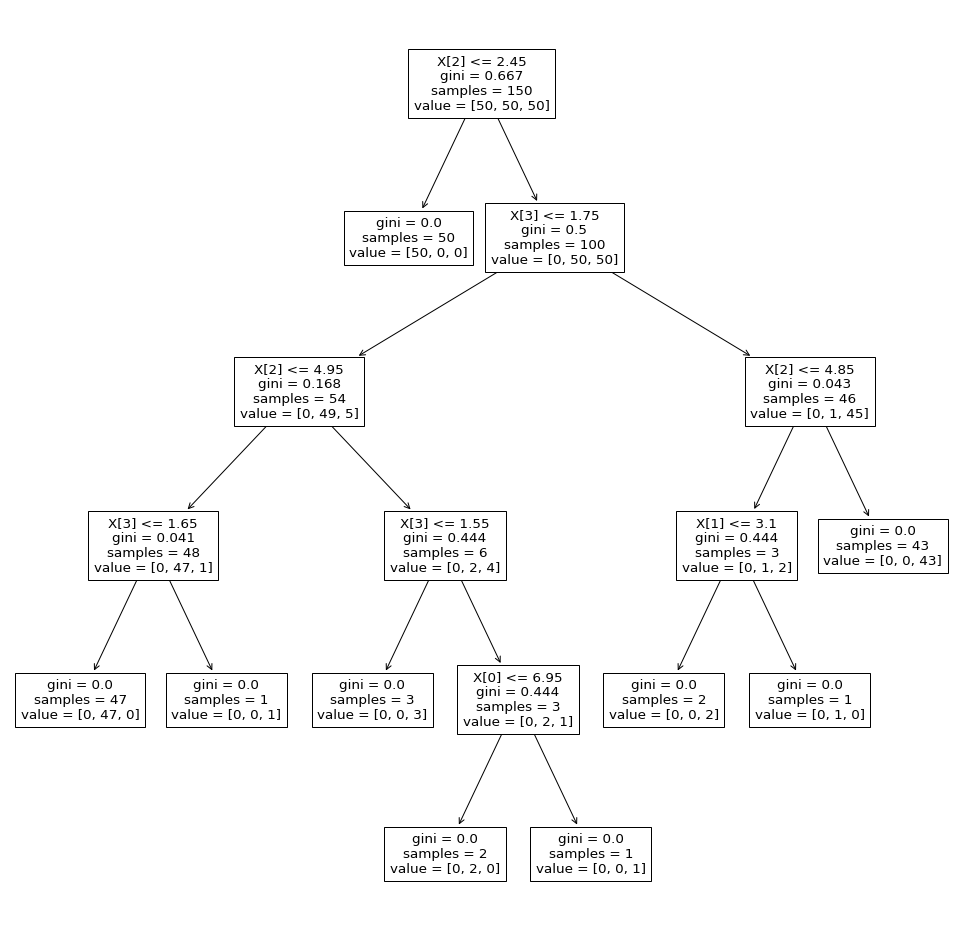

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(17,17))
ax = plot_tree(clf.fit(iris.data,iris.target)) 
plt.show()

Represent the decision boundary of the tree in a mutildimensional scatter plot (numerical features):

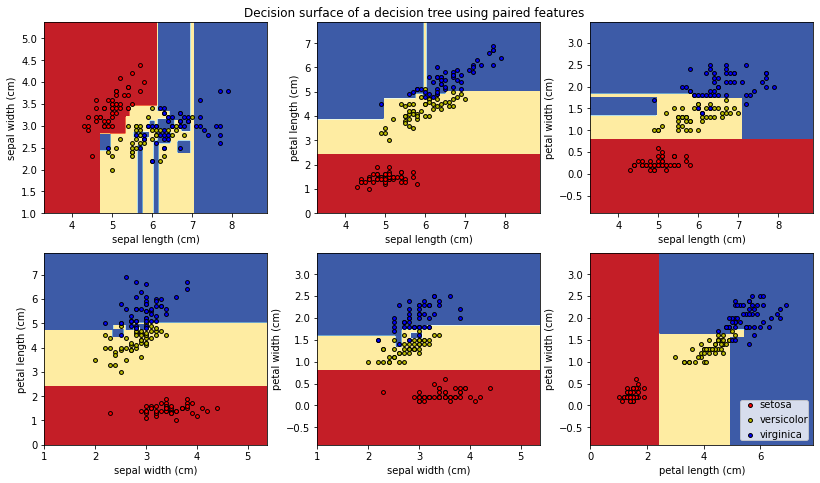

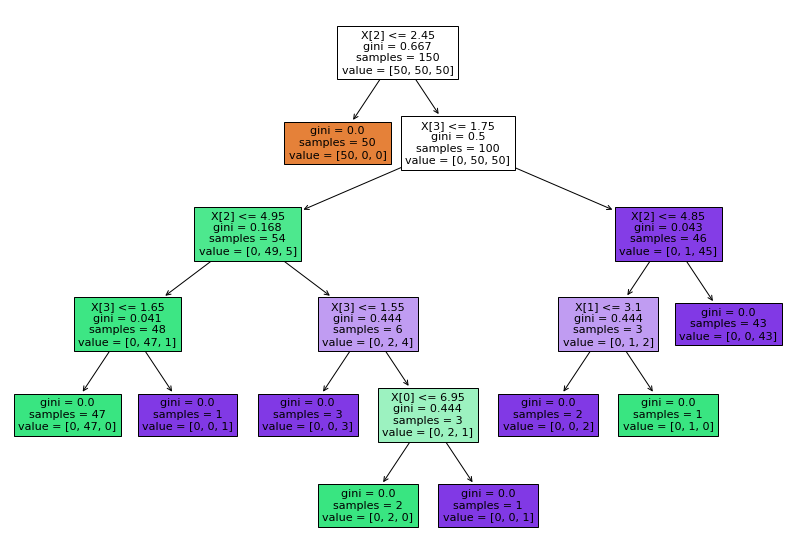

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=(12,7))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(14,10))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()